In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vigneshdv","key":"6dfefe6655dcbcf90e957f34dbf367f4"}'}

In [0]:
!ls -lha kaggle.json
!pip install -q kaggle


-rw-r--r-- 1 root root 65 Oct 12 12:07 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 2.97MB/s]


In [0]:
from zipfile import ZipFile
file_name = '/content/heart-disease-uci.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [0]:
dataset = pd.read_csv("heart.csv")


In [0]:
dataset.shape

(303, 14)

In [0]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [0]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [0]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [0]:
dataset["target"].unique()

array([1, 0])

In [0]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# Exploratory Data Analysis

1    165
0    138
Name: target, dtype: int64


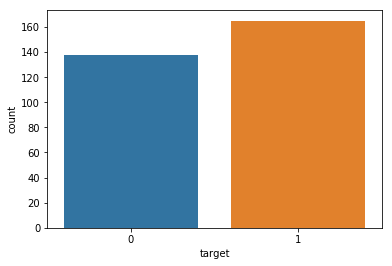

In [0]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [0]:

print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# Analyzing other Attributes

In [0]:
dataset["sex"].unique()

array([1, 0])

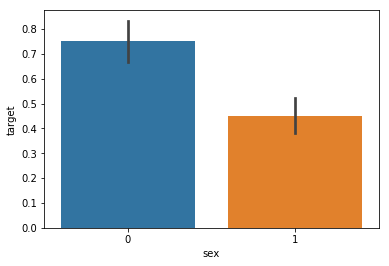

In [0]:
sns.barplot(dataset["sex"],y)


In [0]:
dataset["cp"].unique()

array([3, 2, 1, 0])

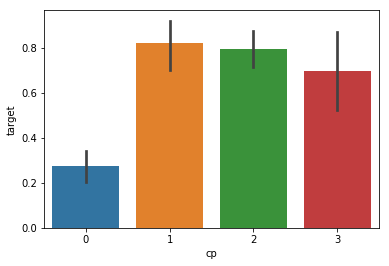

In [0]:

sns.barplot(dataset["cp"],y)

In [0]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [0]:
dataset["fbs"].unique()

array([1, 0])

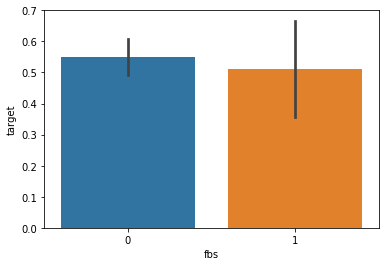

In [0]:
sns.barplot(dataset["fbs"],y)

In [0]:
dataset["restecg"].unique()

array([0, 1, 2])

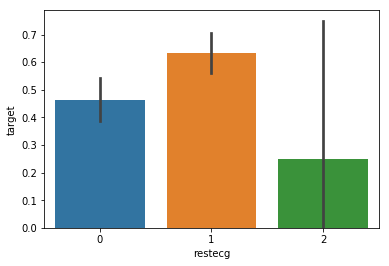

In [0]:
sns.barplot(dataset["restecg"],y)

In [0]:

dataset["exang"].unique()

array([0, 1])

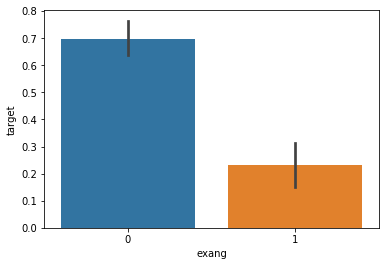

In [0]:
sns.barplot(dataset["exang"],y)

In [0]:
dataset["slope"].unique()

array([0, 2, 1])

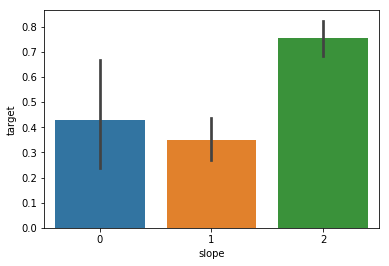

In [0]:
sns.barplot(dataset["slope"],y)

In [0]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

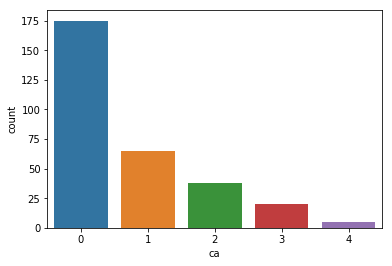

In [0]:
sns.countplot(dataset["ca"])

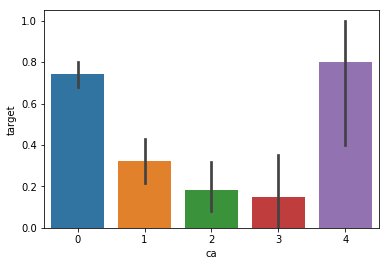

In [0]:
sns.barplot(dataset["ca"],y)

In [0]:
dataset["thal"].unique()


array([1, 2, 3, 0])

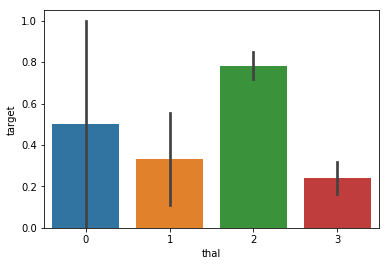

In [0]:
sns.barplot(dataset["thal"],y)

# Model Fitting

In [0]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [0]:
X_train.shape

(242, 13)

In [0]:
X_test.shape

(61, 13)

In [0]:
Y_train.shape

(242,)

In [0]:
Y_test.shape

(61,)

In [0]:
from sklearn.metrics import accuracy_score

## Logisitic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [0]:
Y_pred_lr.shape

(61,)

In [0]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


## Naive Bayers

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [0]:
Y_pred_nb.shape

(61,)

In [0]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


## Support Vector Machines


In [0]:

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [0]:
Y_pred_svm.shape

(61,)

In [0]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# K Nearest Neighbour

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [0]:
Y_pred_knn.shape

(61,)

In [0]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


The accuracy score achieved using KNN is: 67.21 %


In [0]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [0]:

print(Y_pred_dt.shape)

(61,)


In [0]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [0]:
Y_pred_rf.shape


(61,)

In [0]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


# Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

model.fit(X_train,Y_train,epochs=300)




Epoch 1/300





242/242 [==============================] - 1s 4ms/step - loss: 4.5069 - acc: 0.4050
Epoch 2/300
242/242 [==============================] - 0s 72us/step - loss: 3.5006 - acc: 0.3884
Epoch 3/300
242/242 [==============================] - 0s 61us/step - loss: 2.3694 - acc: 0.3967
Epoch 4/300
242/242 [==============================] - 0s 65us/step - loss: 1.7433 - acc: 0.4752
Epoch 5/300
242/242 [==============================] - 0s 63us/step - loss: 1.3028 - acc: 0.5661
Epoch 6/300
242/242 [==============================] - 0s 62us/step - loss: 1.1293 - acc: 0.5579
Epoch 7/300
242/242 [==============================] - 0s 59us/step - loss: 0.9841 - acc: 0.6446
Epoch 8/300
242/242 [==============================] - 0s 58us/step - loss: 0.9119 - acc: 0.6198
Epoch 9/300
242/242 [==============================] - 0s 58us/step - loss: 0.8495 - acc: 0.6446
Epoch 10/300
242/242 [==============================] - 0s 76us/step - loss: 0.8222 - acc: 0.6777
Epoch 11/300
242/242 [

In [0]:
Y_pred_nn = model.predict(X_test)

In [0]:
Y_pred_nn.shape

(61, 1)

In [0]:

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [0]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 86.89 %


## Analysis on all algorithms

In [0]:

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %
The accuracy score achieved using Neural Network is: 86.89 %


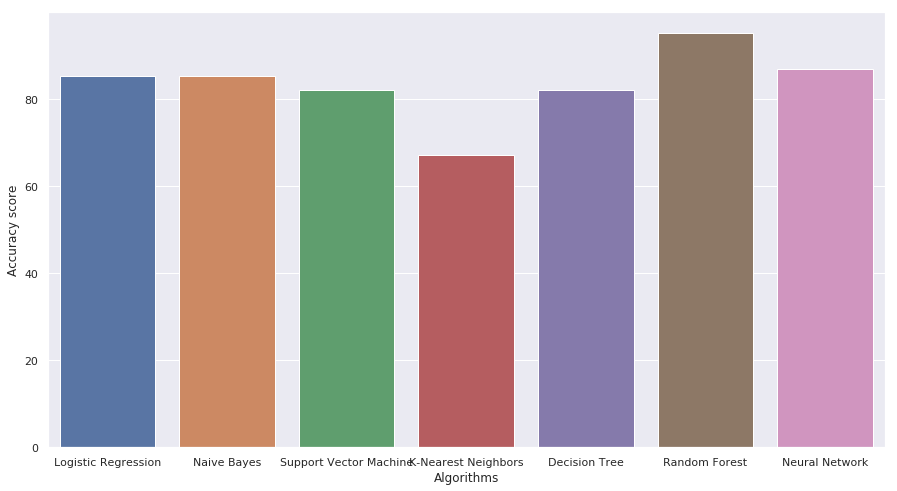

In [0]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)